In [113]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance

import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

In [114]:
rcParams['figure.figsize'] = 5,4

In [115]:
# Import Dataset
address = 'H:/Datasets/heart.csv'

data = pd.read_csv(address)
data.columns = ['age','sex','cp','testbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
data.head()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [116]:
# Quick Descriptive Statistics
data.describe()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## *VARIABLE DESCRIPTIONS*

__age__: The person's age in years <br>
__sex__: The person's sex (1 = male, 0 = female) <br>
__cp__: The chest pain experienced <br> 
Value 1: typical angina <br>
Value 2: atypical angina <br>
Value 3: non-anginal pain <br>
Value 4: asymptomatic) <br>
__trestbps__: The person's resting blood pressure (mm Hg on admission to the hospital) <br>
__chol__: The person's cholesterol measurement in mg/dl <br>
__fbs__: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) <br>
__restecg__: Resting electrocardiographic measurement <br>
    0 = normal <br>
    1 = having ST-T wave abnormality <br>
    2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)<br>
__thalach__: The person's maximum heart rate achieved <br>
__exang__: Exercise induced angina (1 = yes; 0 = no) <br>
__oldpeak__: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here) <br>
__slope__: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping) <br>
__ca__: The number of major vessels (0-3) <br>
__thal__: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect) <br>
__target__: Heart disease (0 = no, 1 = yes) <br>

## FEATURE ENGINEERING

In [117]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['cp'][data['cp'] == 1] = 'typical angina'
data['cp'][data['cp'] == 2] = 'atypical angina'
data['cp'][data['cp'] == 3] = 'non-anginal pain'
data['cp'][data['cp'] == 4] = 'asymptomatic'

data['fbs'][data['fbs'] == 0] = 'lower than 120mg/ml'
data['fbs'][data['fbs'] == 1] = 'greater than 120mg/ml'

data['restecg'][data['restecg'] == 0] = 'normal'
data['restecg'][data['restecg'] == 1] = 'ST-T wave abnormality'
data['restecg'][data['restecg'] == 2] = 'left ventricular hypertrophy'

data['exang'][data['exang'] == 0] = 'no'
data['exang'][data['exang'] == 1] = 'yes'

data['slope'][data['slope'] == 1] = 'upsloping'
data['slope'][data['slope'] == 2] = 'flat'
data['slope'][data['slope'] == 3] = 'downsloping'

data['thal'][data['thal'] == 1] = 'normal'
data['thal'][data['thal'] == 2] = 'fixed defect'
data['thal'][data['thal'] == 3] = 'reversable defect'

C:\Users\s063139\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\s063139\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\s063139\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [143]:
data.dtypes

age                                       int64
testbps                                   int64
chol                                      int64
thalach                                   int64
oldpeak                                 float64
ca                                        int64
target                                    int64
sex_male                                  uint8
cp_atypical angina                        uint8
cp_non-anginal pain                       uint8
cp_typical angina                         uint8
fbs_lower than 120mg/ml                   uint8
restecg_left ventricular hypertrophy      uint8
restecg_normal                            uint8
exang_yes                                 uint8
slope_flat                                uint8
slope_upsloping                           uint8
thal_fixed defect                         uint8
thal_normal                               uint8
thal_reversable defect                    uint8
dtype: object

In [144]:
data['sex'] = data['sex'].astype('object')
data['cp'] = data['cp'].astype('object')
data['fbs'] = data['fbs'].astype('object')
data['restecg'] = data['restecg'].astype('object')
data['exang'] = data['exang'].astype('object')
data['slope'] = data['slope'].astype('object')
data['thal'] = data['thal'].astype('object')

KeyError: 'sex'

In [145]:
data = pd.get_dummies(data, drop_first=True)
data

,age,testbps,chol,thalach,oldpeak,ca,target,sex_male,cp_atypical angina,cp_non-anginal pain,cp_typical angina,fbs_lower than 120mg/ml,restecg_left ventricular hypertrophy,restecg_normal,exang_yes,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
299,45,110,264,132,1.2,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
300,68,144,193,141,3.4,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1
301,57,130,131,115,1.2,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1


## Validating that dataset meets Logistic Regression Assumptions

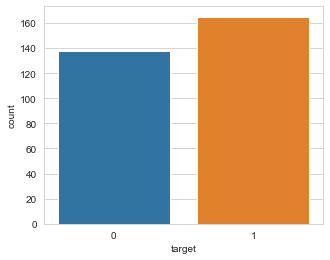

In [146]:
# Checking that your target variable is binary
sb.countplot(x='target',data=data,)

In [147]:
#Checking for missing values
data.isnull().sum()

age                                     0
testbps                                 0
chol                                    0
thalach                                 0
oldpeak                                 0
ca                                      0
target                                  0
sex_male                                0
cp_atypical angina                      0
cp_non-anginal pain                     0
cp_typical angina                       0
fbs_lower than 120mg/ml                 0
restecg_left ventricular hypertrophy    0
restecg_normal                          0
exang_yes                               0
slope_flat                              0
slope_upsloping                         0
thal_fixed defect                       0
thal_normal                             0
thal_reversable defect                  0
dtype: int64

## Checking for independence between features

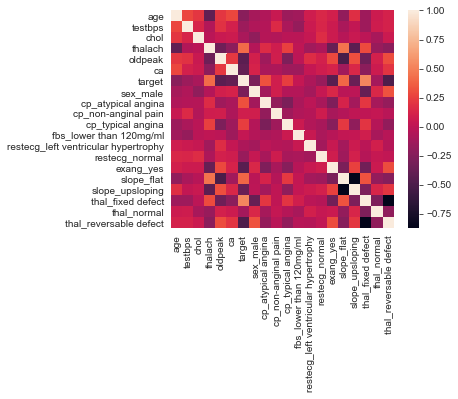

In [148]:
sb.heatmap(data.corr())

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   303 non-null    int64  
 1   testbps                               303 non-null    int64  
 2   chol                                  303 non-null    int64  
 3   thalach                               303 non-null    int64  
 4   oldpeak                               303 non-null    float64
 5   ca                                    303 non-null    int64  
 6   target                                303 non-null    int64  
 7   sex_male                              303 non-null    uint8  
 8   cp_atypical angina                    303 non-null    uint8  
 9   cp_non-anginal pain                   303 non-null    uint8  
 10  cp_typical angina                     303 non-null    uint8  
 11  fbs_lower than 120m

In [150]:
# Splitting test and training datasets
X_train, X_test, y_train, y_test = train_test_split(data.drop('target',axis=1),data['target'], test_size=0.2)

In [151]:
print(X_train.shape) #242 records, 19 columns
print(y_train.shape) #242 records, 1 column

(242, 19)
(242,)


## Deploying and Evaluating the Model

### __Logistic Regression__

In [158]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
y_predLR = LogReg.predict(X_test)

In [160]:
# Classification report without cross-validation
print(classification_report(y_test,y_predLR))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78        29
           1       0.78      0.88      0.82        32

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



### Logistic Regression: Permutation importance

In [180]:
perm = PermutationImportance(LogReg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0328 ± 0.0207,ca
0.0328 ± 0.0549,thalach
0.0230 ± 0.0334,sex_male
0.0230 ± 0.0572,cp_atypical angina
0.0164 ± 0.0293,restecg_normal
0.0131 ± 0.0131,cp_non-anginal pain
0.0098 ± 0.0675,exang_yes
0.0033 ± 0.0482,thal_reversable defect
0.0000 ± 0.0207,oldpeak
0 ± 0.0000,restecg_left ventricular hypertrophy


### __Random Forest__

In [161]:
RF = RandomForestClassifier(max_depth=5)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [162]:
y_predRF = RF.predict(X_test)

In [171]:
# Classification report without cross-validation
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        29
           1       0.76      0.81      0.79        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [172]:
# K-fold cross-validation & confusion matrices
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)

In [173]:
precision_score(y_train,y_train_pred)

0.8321167883211679

###  Random Forest: Permutation importance 

In [179]:
perm = PermutationImportance(RF, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0328 ± 0.0293,cp_atypical angina
0.0164 ± 0.0000,testbps
0.0164 ± 0.0207,fbs_lower than 120mg/ml
0.0164 ± 0.0359,restecg_normal
0.0098 ± 0.0161,sex_male
0.0033 ± 0.0245,chol
0 ± 0.0000,cp_typical angina
0 ± 0.0000,restecg_left ventricular hypertrophy
0 ± 0.0000,thal_normal
0 ± 0.0000,cp_non-anginal pain
